### Using Normal Equation to find the best parameters

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
X = np.random.rand(100,1) # Generating Random Set of feature values.
y = 3 + 2 * X  + np.random.randn(100,1) # Function to determine y values for a set of feature values.

Text(0, 0.5, 'Output Value')

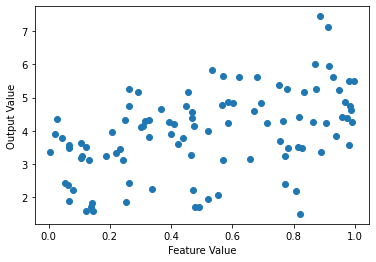

In [13]:
# Plotting the Output Value with respect to feature value.
plt.scatter(X,y)
plt.xlabel('Feature Value')
plt.ylabel('Output Value')

In [14]:
# Creating an array of 1's for Bias Term and Appending the same in input Matrix X

X_nomral_eqn = np.c_[np.ones((100,1)),X]

### Vectorised representation of Normal Equation for Parameter Estimation: 

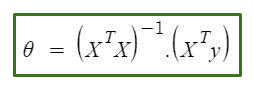

### $ \theta $ : Parameter Vector
### X : Input Feature Vector
### y : Output Result Vector

##                        Matrix Representation and calculation for finding the Best Parameters
#### np.linalg.inv :             Numpy package for Linear Algebra to evaluate the Inverse of any input Matrix
#### np.dot():          Numpy method to calculate dot product of 2 input matrix
#### .T :                    Evaluates the Transpose of a Matrix

In [15]:
normal_eqn_theta = np.linalg.inv(X_nomral_eqn.T.dot(X_nomral_eqn)).dot(X_nomral_eqn.T).dot(y)
normal_eqn_theta # Best parameters evaluated for matrix X

array([[2.95481383],
       [1.87342723]])

In [29]:
X_normal_eqn_test = np.array([[0],[2]]) # Creating Test Input Feature Array
X_normal_eqn_test = np.c_[np.ones((2,1)),X_normal_eqn_test] # Appending 1's for Bias Term
X_normal_eqn_test

array([[1., 0.],
       [1., 2.]])

#### Predicting y value for X_normal_eqn_test Array using calculated paramters $ \theta $

In [30]:
y_predict_normal_eqn = X_normal_eqn_test.dot(normal_eqn_theta)
y_predict_normal_eqn

array([[2.95481383],
       [6.7016683 ]])

(0.0, 1.0, 0.0, 7.0)

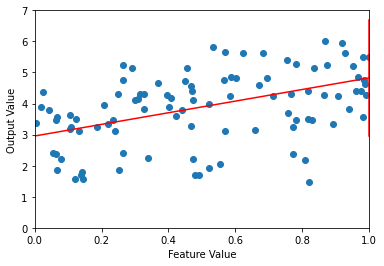

In [31]:
plt.plot(X_normal_eqn_test,y_predict_normal_eqn,'r')
plt.scatter(X,y)
plt.xlabel('Feature Value')
plt.ylabel('Output Value')
plt.axis([0,1,0,7])

##### Using Normal Equation on Advertising DataSet to predict Sales based on Input Features of Cost invested in TV, Radio, Newspaper
##### Advertisement

In [32]:
import pandas as pd

In [33]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [34]:
X_data = np.array(data.iloc[:150,1:4]) # Using Columns as Features and converting to array
X_data[:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

In [35]:
X_data = np.array(data.iloc[:150,1:4]) # Using Columns as Features and converting to array
X_data[:5]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

In [36]:
y = np.array(data.iloc[:150,-1]) # Initialising Output Value
y[:5]

array([22.1, 10.4,  9.3, 18.5, 12.9])

In [37]:
theta_best = np.linalg.inv(X_data.T.dot(X_data)).dot(X_data.T).dot(y) # Calculating the best Paramters
theta_best

array([ 3.02976680e+00,  4.70001192e-02,  1.79932571e-01, -1.40273317e-03])

In [38]:
X_test = np.array(data.iloc[150:,1:4]) # Creating Test matrix with Input Dataset
X_test = np.c_[np.ones((50,1)),X_test]
X_test[:5]

array([[  1. , 280.7,  13.9,  37. ],
       [  1. , 121. ,   8.4,  48.7],
       [  1. , 197.6,  23.3,  14.2],
       [  1. , 171.3,  39.7,  37.7],
       [  1. , 187.8,  21.1,   9.5]])

#### Predicting y value for a give array for X values using calculated $ \theta $

In [39]:
y_test = np.array(data.iloc[150:,-1])
#y_test = np.c_[np.ones((50,1)),y_test]
y_test[:5]

array([16.1, 11.6, 16.6, 19. , 15.6])

In [40]:
y_predict = X_test.dot(theta_best)
y_predict

array([18.67186188, 10.15990172, 16.48950045, 18.17132726, 15.63964047,
        5.30168953, 15.19930681, 10.27021058, 10.15577653, 12.48190724,
       14.35100299, 13.43010832, 15.10545883, 17.32542469, 11.17561481,
       14.54411372, 10.60623457, 13.6578278 , 17.31920373, 18.29020846,
        7.44118029, 14.4553876 ,  7.54376735, 12.20415315, 14.07598825,
       24.7841683 , 20.11008458, 12.38328494, 16.41529992, 12.58762415,
       10.84616747, 14.23249384,  6.65512798, 24.18338541, 18.74887883,
       20.75225663,  9.92682913, 17.15002463, 18.96767352,  6.05302918,
       12.27336433,  8.51313117,  4.53156602, 18.42150484, 16.46286778,
        5.47156415,  8.32748549, 13.01318332, 23.82330766, 15.4737108 ])

In [41]:
np.array(data.iloc[150:,-1])

array([16.1, 11.6, 16.6, 19. , 15.6,  3.2, 15.3, 10.1,  7.3, 12.9, 14.4,
       13.3, 14.9, 18. , 11.9, 11.9,  8. , 12.2, 17.1, 15. ,  8.4, 14.5,
        7.6, 11.7, 11.5, 27. , 20.2, 11.7, 11.8, 12.6, 10.5, 12.2,  8.7,
       26.2, 17.6, 22.6, 10.3, 17.3, 15.9,  6.7, 10.8,  9.9,  5.9, 19.6,
       17.3,  7.6,  9.7, 12.8, 25.5, 13.4])

#### Calculating the Mean Squared Error

In [42]:
mean_squared_error = np.square(y_predict-y_test).mean()
mean_squared_error

2.6670248683837037